In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pylab import *
from matplotlib.animation import FuncAnimation




#Importation des données dans le dataFrame geo
geo = pd.read_csv('AllBirdsv4.csv', sep=',', header=0, encoding='utf-8') 

K_birds=pd.read_csv(r"Test Birds Location.csv", sep=',',header=0)
K_birds.columns=['Id', 'X', 'Y']


#Affichage des premiers éléments
geo.head()

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
0,402254,Rose-crested Blue Pipit,call,no score,13:30,2/8/2018,49,63
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,133
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76
3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,125
4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,123


In [12]:
def description(dataframe=geo) :
    print(dataframe.columns)
    print('---------')
    print(dataframe.info())
    print('---------')
    print(dataframe.describe(include='all'))
    print('---------')
    print('NA values for X column :' + str(dataframe['X'].isna().sum()))
    print('NA values for Y column : ' + str(dataframe['Y'].isna().sum()))
    for i in dataframe.columns : 
        print(':::::')
        print(i)
        print(len(dataframe[i].unique()))
        if (len(dataframe[i].unique())<=20) : 
            print(dataframe[i].unique())
    print('---------')
    print(dataframe.head())
    
def codify(column) :
    return pd.Categorical(column).codes

def histo(column) : 
    plt.hist(column, bins = len(column.unique()))
    plt.xticks(rotation=90)
    plt.show()

# Préparation des données

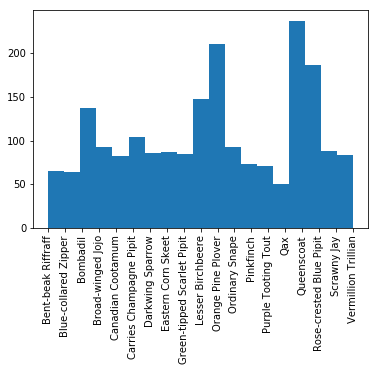

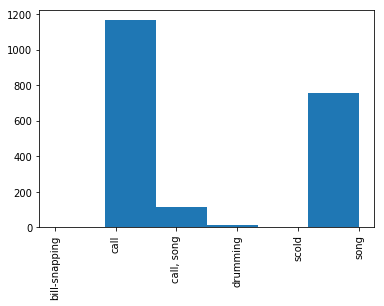

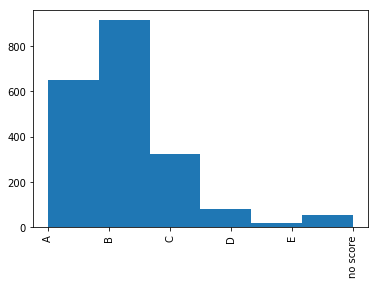

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y,cod_English_name,cod_Vocalization_type,cod_Quality,Year,Distance_kasios,Diff_date,Diff_date_norm
0,402254,Rose-crested Blue Pipit,call,no score,13:30,2018-02-08,49,63.0,16,1,5,2018.0,137.902139,37.0,0.987667
1,406171,Rose-crested Blue Pipit,call,A,7:48,2017-06-07,125,133.0,16,1,0,2017.0,34.713110,283.0,0.905667
2,405901,Rose-crested Blue Pipit,call,A,12:00,2018-02-08,58,76.0,16,1,0,2018.0,122.429572,37.0,0.987667
3,405548,Rose-crested Blue Pipit,song,A,11:00,2018-03-10,55,125.0,16,5,0,2018.0,99.020200,7.0,0.997667
4,401782,Rose-crested Blue Pipit,song,A,6:00,2008-06-29,129,123.0,16,5,0,2008.0,40.706265,3548.0,-0.182667


In [13]:
geo['Vocalization_type'] = geo['Vocalization_type'].str.strip()
geo['Vocalization_type'] = geo['Vocalization_type'].str.lower()
geo['Vocalization_type'] = geo['Vocalization_type'].replace('?', None)
geo['Vocalization_type'].unique()
geo['Date'] = pd.to_datetime(geo['Date'], format='%m/%d/%Y', errors='coerce')

histo(geo['English_name'])
histo(geo['Vocalization_type'])
histo(geo['Quality'])
geo.head()


In [14]:
geo['cod_English_name'] = codify(geo['English_name'])
geo['cod_Vocalization_type'] = codify(geo['Vocalization_type'])
geo['cod_Quality'] = codify(geo['Quality'])
geo['Y'] = pd.to_numeric(geo['Y'], errors='coerce')
geo['Year'] = geo['Date'].dt.year

geo['Distance_kasios'] = ((geo['X']-148)**2+(geo['Y']-159)**2)**0.5
geo['Diff_date']=(max(geo['Date'])-geo['Date']).dt.days

geo['Diff_date_norm'] = 1-geo['Diff_date']/3000 #2603 est le troisieme quartile
geo[geo['Diff_date_norm']>1]['Diff_date_norm'] = 1
geo[geo['Diff_date_norm']<0]['Diff_date_norm'] = 0
geo.head()
geo=geo.dropna()

C:\Users\user\Miniconda3\envs\EnvNeo\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


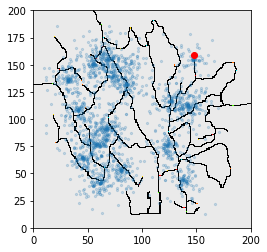

In [15]:
plt.figure(figsize=(400, 400))
img = plt.imread("Lekagul Roadways 2018.bmp")
fig, ax = plt.subplots()
ax.imshow(img, extent=[0, 200, 0, 200])
plt.scatter(geo['X'], geo['Y'], s=5, alpha=0.2)
plt.scatter(148,159, c='red')
#plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000143CF4B6588>]],
      dtype=object)

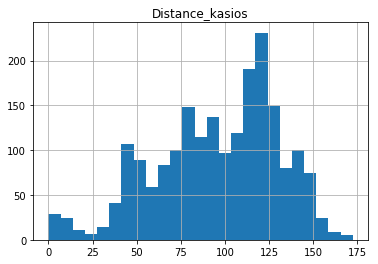

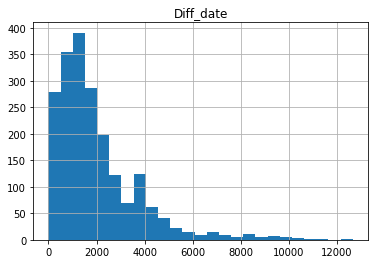

In [16]:
geo.hist(column='Distance_kasios', bins=25)
geo.hist(column='Diff_date', bins=25)

#  Density plot
---------------

Text(0.5,1,'Birds density around Kassios')

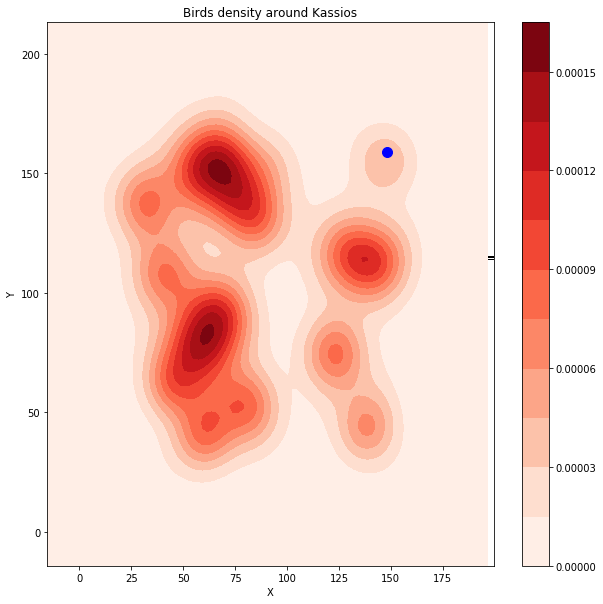

In [17]:
#pip install seaborn
import seaborn as sns

plt.figure(figsize=(10,10))
image= array(Image.open(r"Lekagul Roadways 2018.bmp").convert('L'))
contourf(image, levels=[110,120], colors='black', origin='image', extent=[0, 200, 0, 200])
sns.kdeplot(geo['X'], geo['Y'], cmap="Reds", shade_lowest=True, cbar=True, n_levels=10, shade=True)
plt.scatter(148,159, c='blue', s=100)
plt.title('Birds density around Kassios')

# Plotting with transparency
________________________________

<IPython.core.display.Javascript object>


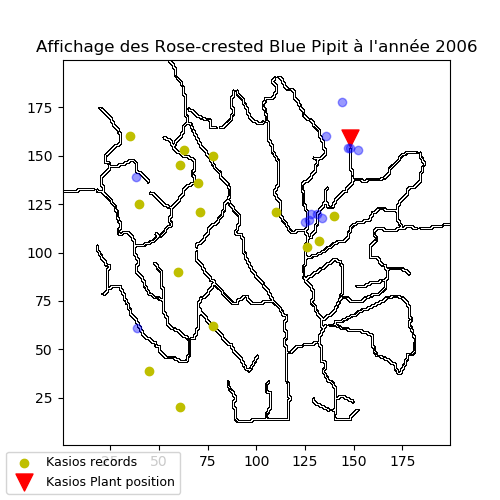

In [18]:
%matplotlib notebook
fig = plt.figure(figsize=(5,5))

#xdata, ydata = [], []
#ln, = plt.plot([], [], animated=True)

def init() : 
    fig.clf()
    image= array(Image.open(r"Lekagul Roadways 2018.bmp").convert('L'))
    contourf(image, levels=[110,120], colors='black', origin='image', extent=[0, 200, 0, 200])
    K_plant = plt.scatter(148,159, color='r', marker='v', s=150)
    K_b = plt.scatter(K_birds['X'], K_birds['Y'], c='y')
    fig.legend((K_b, K_plant),
           ('Kasios records', 'Kasios Plant position'),
           scatterpoints=1,
           loc='lower left',
           ncol=1,
           fontsize=9)


    
def update(i) :
    bird_number = 16
    tmp = geo[geo['cod_English_name']== bird_number]
    tmp2 = tmp[tmp['Year']==i]
    xdata = (tmp2['X'])
    ydata = (tmp2['Y'])
    plt.title("Affichage des {} à l'année {}".format(geo[geo['cod_English_name']==bird_number]['English_name'].iloc[0], i))
    #sns.kdeplot(xdata, ydata)
    all_b = plt.scatter(xdata, ydata, c='b', alpha=0.4)
    return all_b




# read image to array

ani = FuncAnimation(fig, update, frames=range(int(min(geo['Year'])),int(max(geo['Year']))), init_func=init, interval=2000, repeat=True, repeat_delay=5000)


In [9]:
%matplotlib inline
